# Solving imbalance issue of dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sb
%matplotlib inline

# to hide all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

<Axes: xlabel='stroke', ylabel='count'>

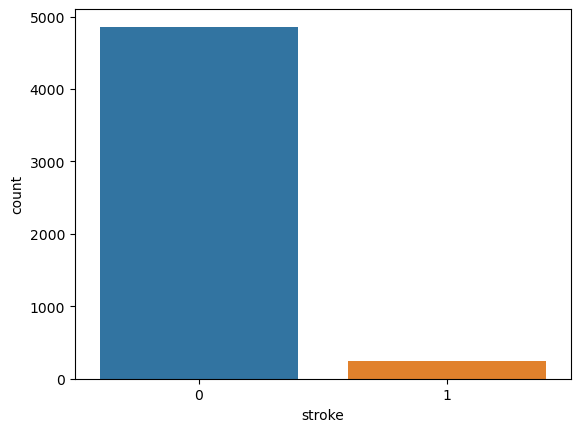

In [6]:
# visualizing imbalance issue in target feature
sb.countplot(data = df, x = df["stroke"])

In [7]:
# Handling null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df["bmi"].fillna(df["bmi"].mean(), inplace = True)

In [9]:
# Dropping unneccessary column
df.drop("id", axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## Label Encoding

In [12]:
# import label encoder
from sklearn.preprocessing import LabelEncoder

# create a list of features which needed encoding
categorical_features = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]

for feature in categorical_features:
    #initialize label encoder
    encoder = LabelEncoder()
    #Fit & Transform
    encoded_data = encoder.fit_transform(df[feature])
    df[feature] = encoded_data

In [13]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# SMOTE :- Synthetic Minority Over-sampling Technique

In [14]:
!pip install imbalanced-learn

In [15]:
# Splitting fro doing sampling
from sklearn.model_selection import train_test_split

# Seperating target feature
y = df["stroke"]
x = df.drop(columns = "stroke")

## Applying SMOTE 

In [19]:
from imblearn.over_sampling import SMOTE

# Create a  SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)
# Apply SMOTE on X Y
x_resampled, y_resampled = smote.fit_resample(x,y)
# Convert back to df
x_resampled_df = pd.DataFrame(x_resampled, columns=x.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)